# Unsupervised Learning

What is **unsupervised learning**?
Unsupervised learning is about understanding how to group data when:
 * Do not have a label to predict. An example of this is using an algorithm to look at brain scans to find areas that may raise concern. You don't have labels on the images to understand what areas might raise reason for concern, but you can understand which areas are most similar or different from one another.
 * Are not trying to predict a label, but rather group our data together for some other reason! One example of this is when you have tons of data, and you would like to condense it down to a fewer number of features to be used.

## Topics Covered in This Section:

 * Clustering:
     > Clustering is one of the most popular unsupervised approaches. In a first look at clustering, you will gain an understanding of what clustering your data means. Then, you will see how the k-means algorithm works. You will put your skills to work to find groupings of similar movies!
 
 * Hierarchial and Density Based Clustering:
     > Another set of clustering algorithms takes an approach of using density based 'closeness' measures. At the end of the lesson, you will see how this can be used in traffic classification, as well as in anomaly detection (finding points that aren't like others in your dataset).
 
 * Gaussian Mixture Models and Cluster Validation:
     > To extend the density based approaches, you will get some practice with gaussian mixture models. This technique is not far from what you learned in the previous lesson, and it is the last of the clustering algorithms you will learn before moving to matrix decomposition methods.
 
 * Principal Component Analysis:
     > Principal component analysis is one of the most popular decomposition methods available today. In this lesson, you will learn how matrix decomposition methods work conceptually. Then you will apply principal component analysis to images of handwritten digits to reduce the dimensionality of these images.
 
 * Random Projection and Independent Component Analysis:
     > Another way to decompose data is through independent component analysis. In this lesson, you will see how this method can pull apart audio related to a piano, cello, and television that has been overlaid in the same file.

# Types of Unsupervised Learning
1. Clustering: which groups data together based on similarities
2. Dimmensionality Reduction: which condenses a large number of features into a (usually much) smaller set of features

# Clustering Algorithm: K-Means
The K-Means algorithm is used to cluster all sorts of data.

It can group together
 * Books of similar genres or written by the same authors.
 * Similar movies.
 * Similar music.
 * Similar groups of customers.

This clustering can lead to product, movie, music and other types of recommendations.

In the K-means algorithm **'k' represents the number of clusters you have in your dataset**. In this video, you saw that a k value of two makes a lot of sense. There is one cluster of points with shorter distances for when I travel to work. A second cluster is created when I travel to my parents' house.

Visually inspecting your data easily shows these two clusters. On the next page, you will have an opportunity to make sure you have this technique for finding clusters mastered.

## Identifying Clusters

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import helper_functions as h
import test_file as t
from IPython import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Make the images larger
plt.rcParams['figure.figsize'] = (16, 9)

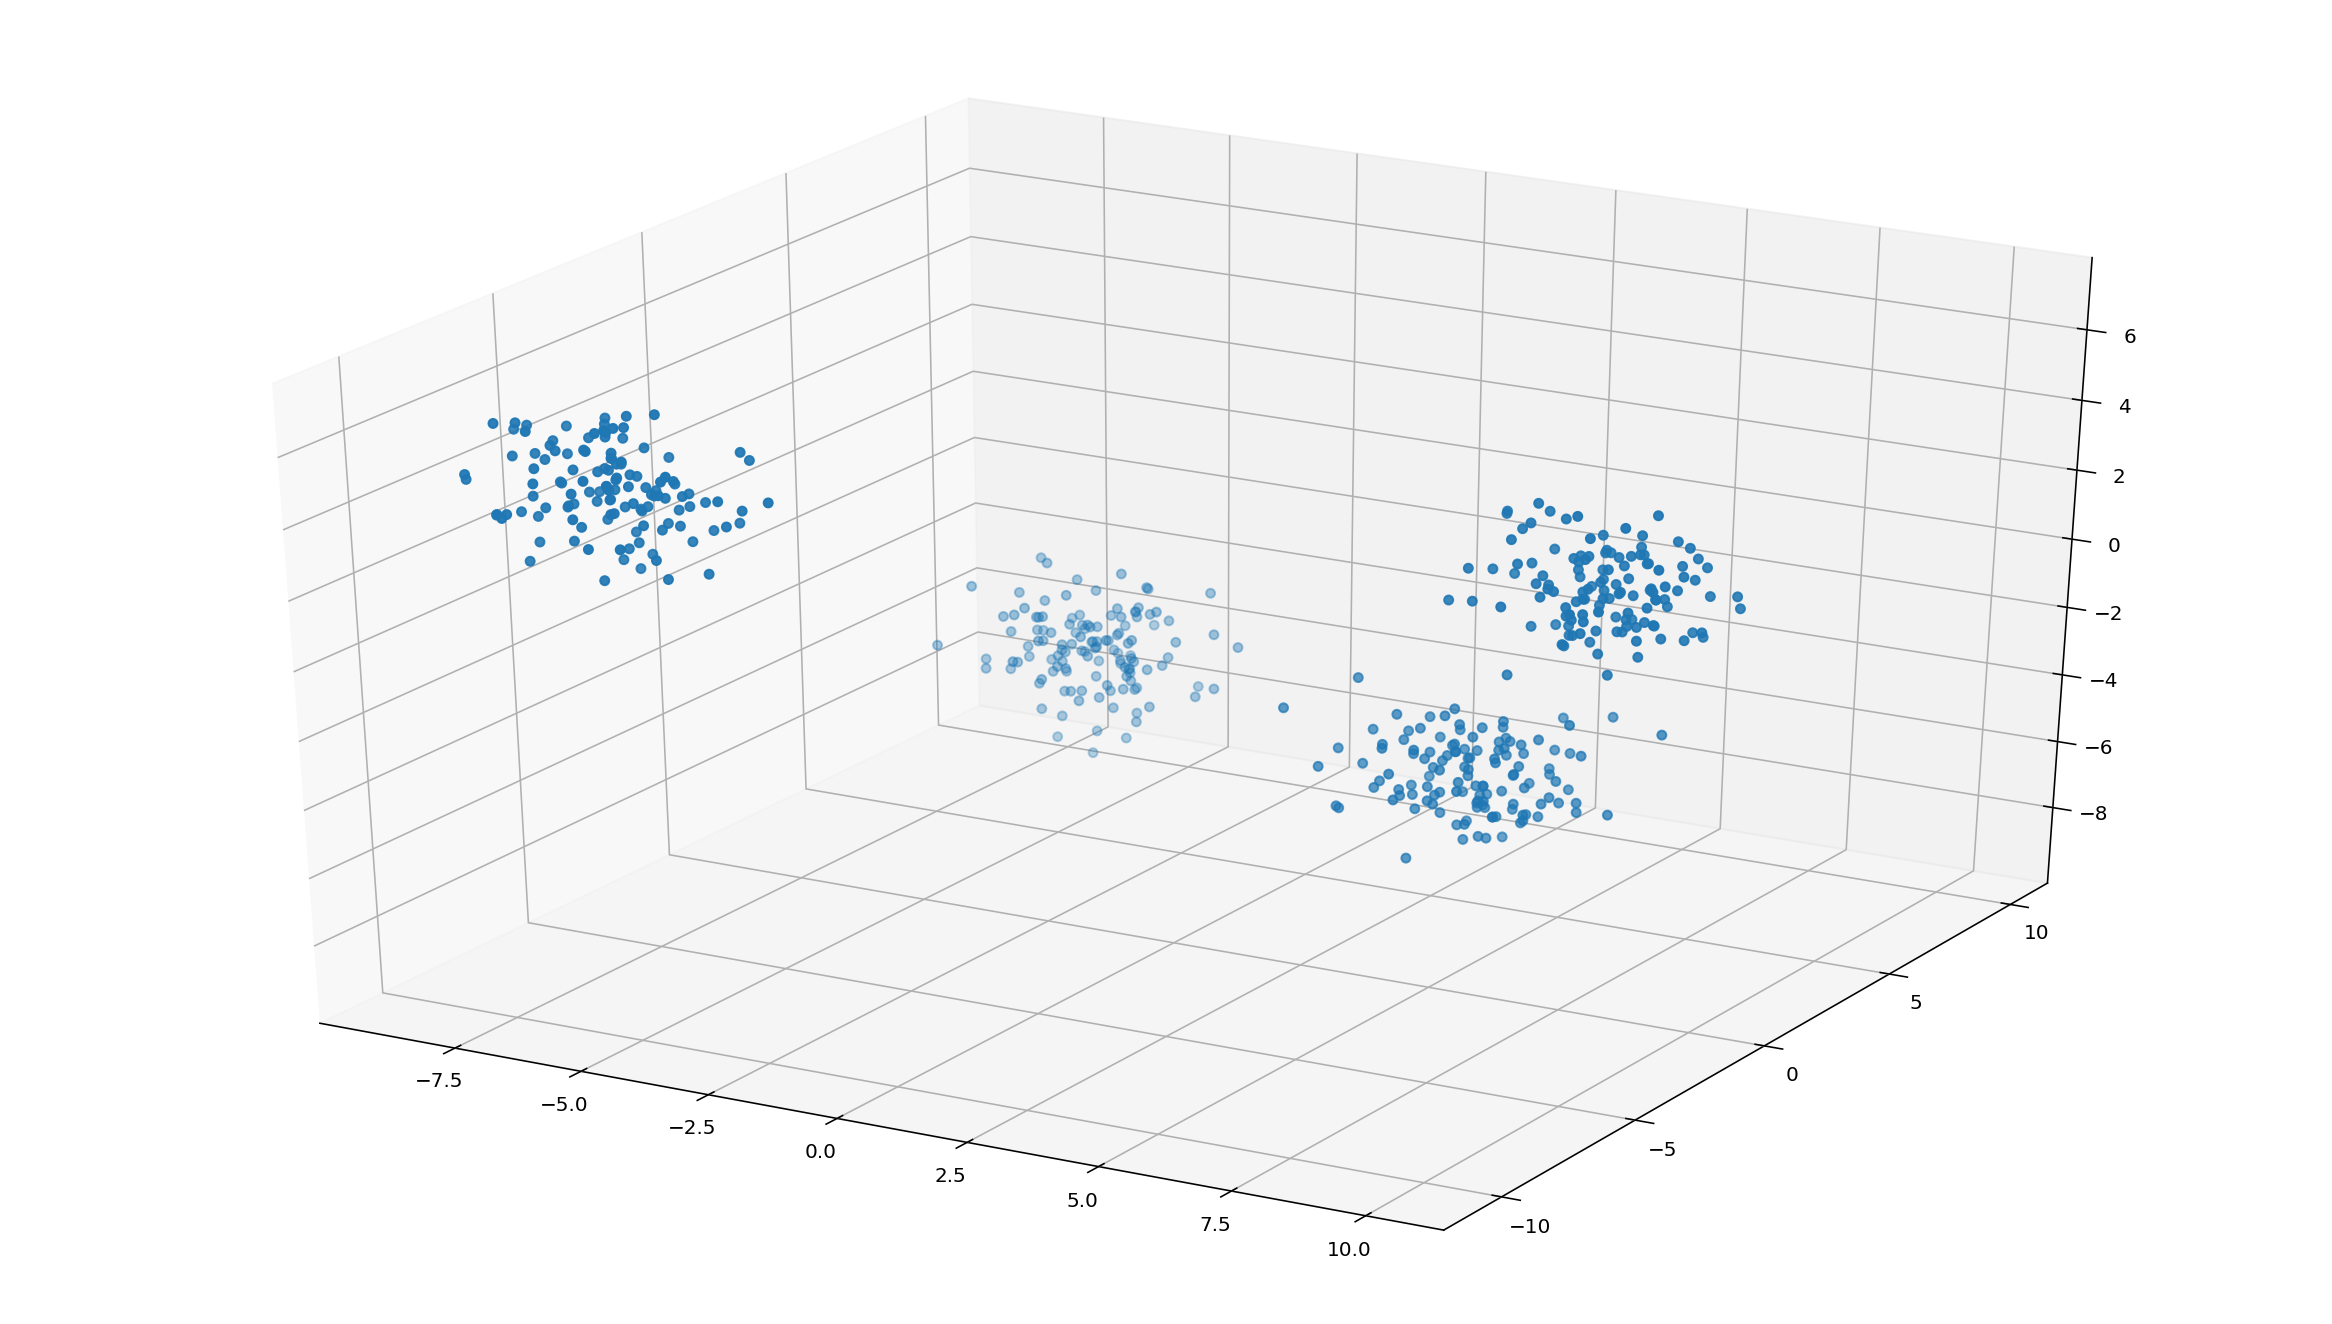

In [3]:
h.plot_q1_data()

In [4]:
question_1_clusters = 4

#Then this will test your number against what we used to generate the data
t.test_question_1(question_1_clusters)

That's right!  There are 4 clusters in this dataset.


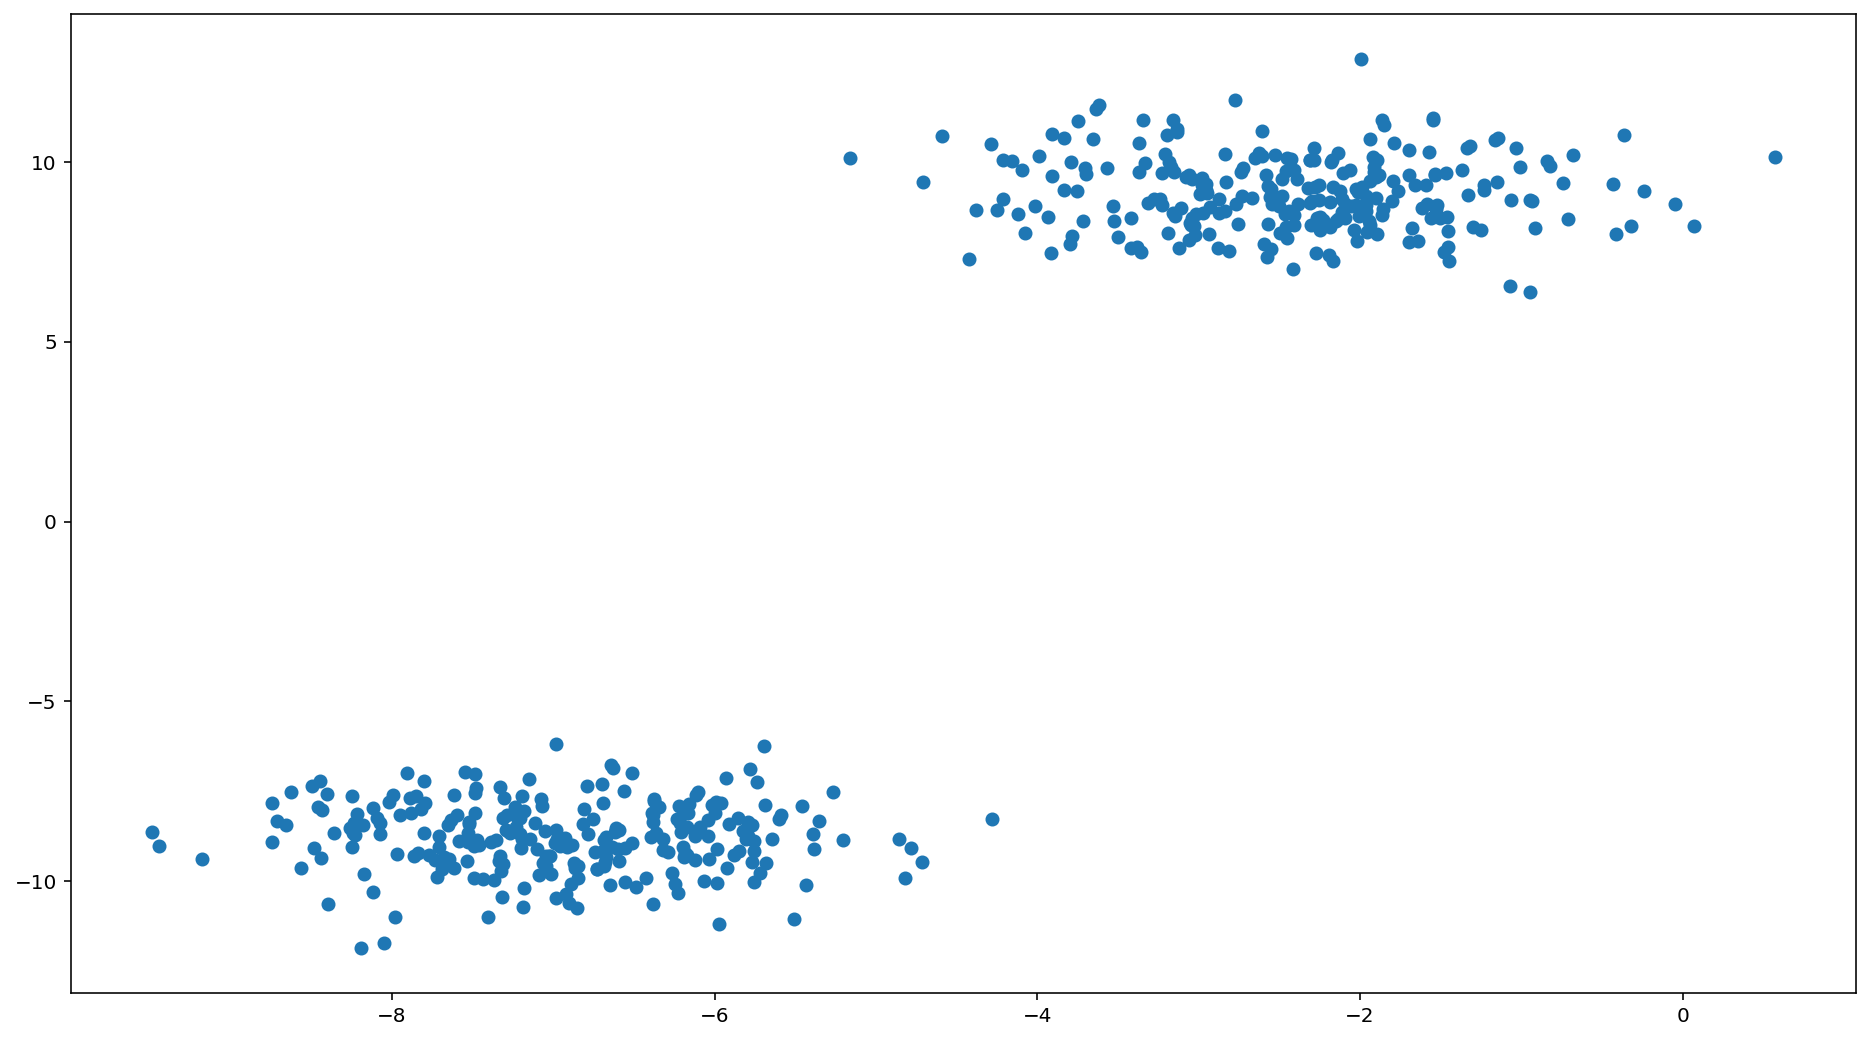

In [5]:
h.plot_q2_data()

In [6]:
question_2_clusters = 2

#Then this will test your number against what we used to generate the data
t.test_question_2(question_2_clusters)

That's right!  There are 2 clusters in this dataset.


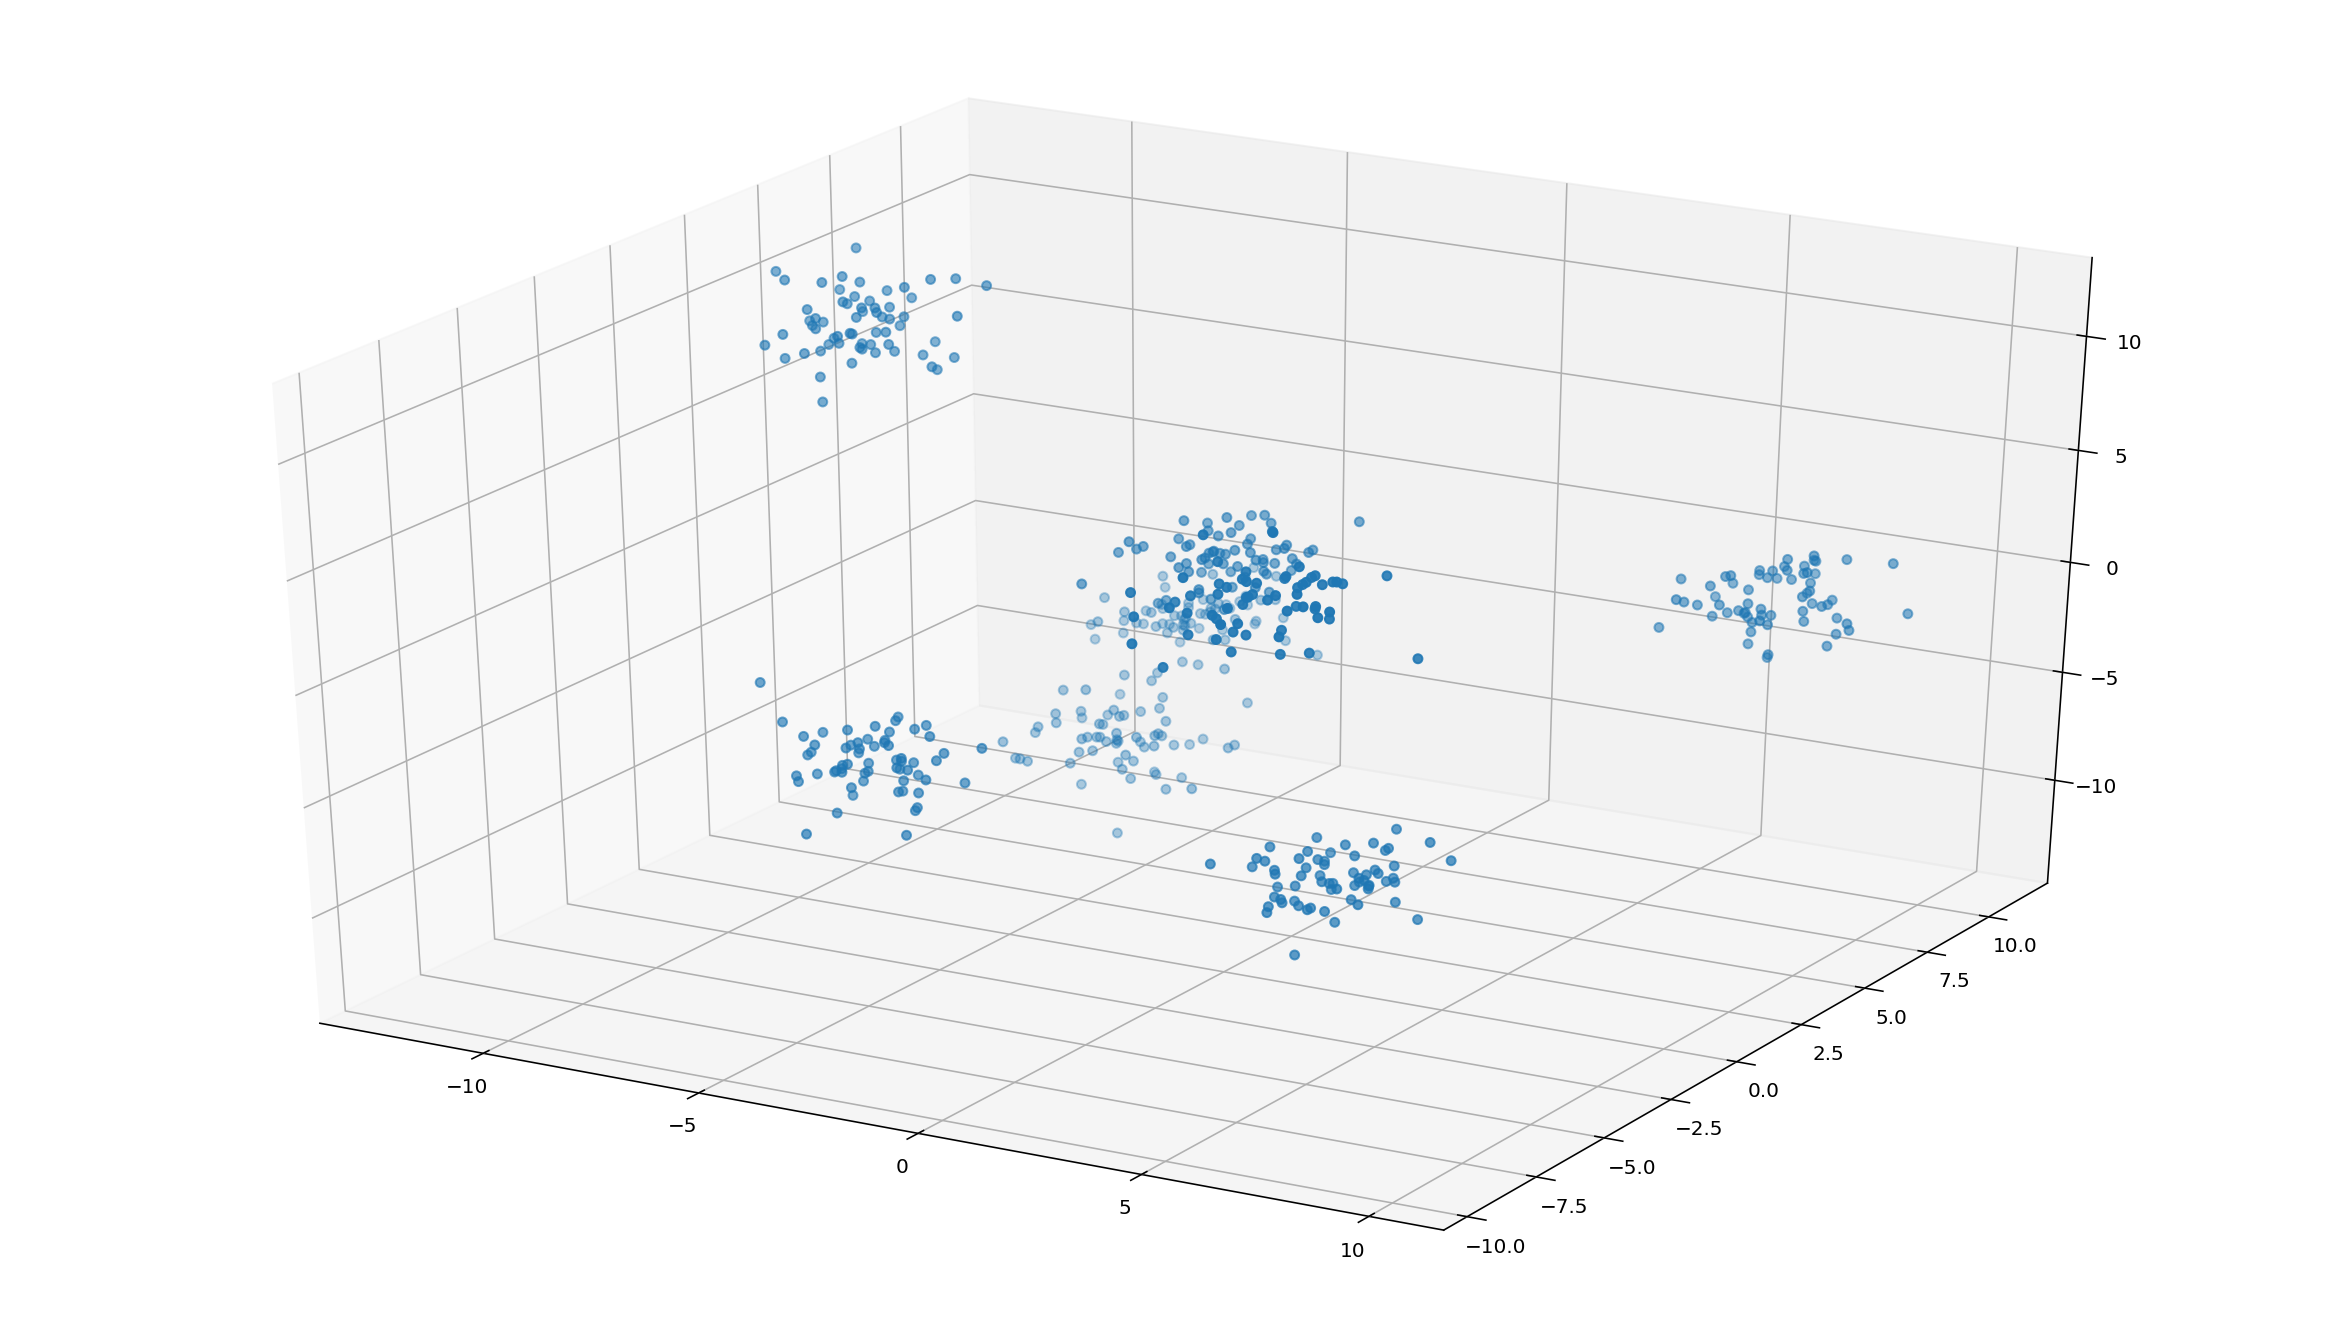

In [7]:
h.plot_q3_data()

In [8]:
question_3_clusters = 6

#Then this will test your number against what we used to generate the data
t.test_question_3(question_3_clusters)

6 is a reasonable guess for a the number of clusters here.  In the next question, you will see a different angle of this data.


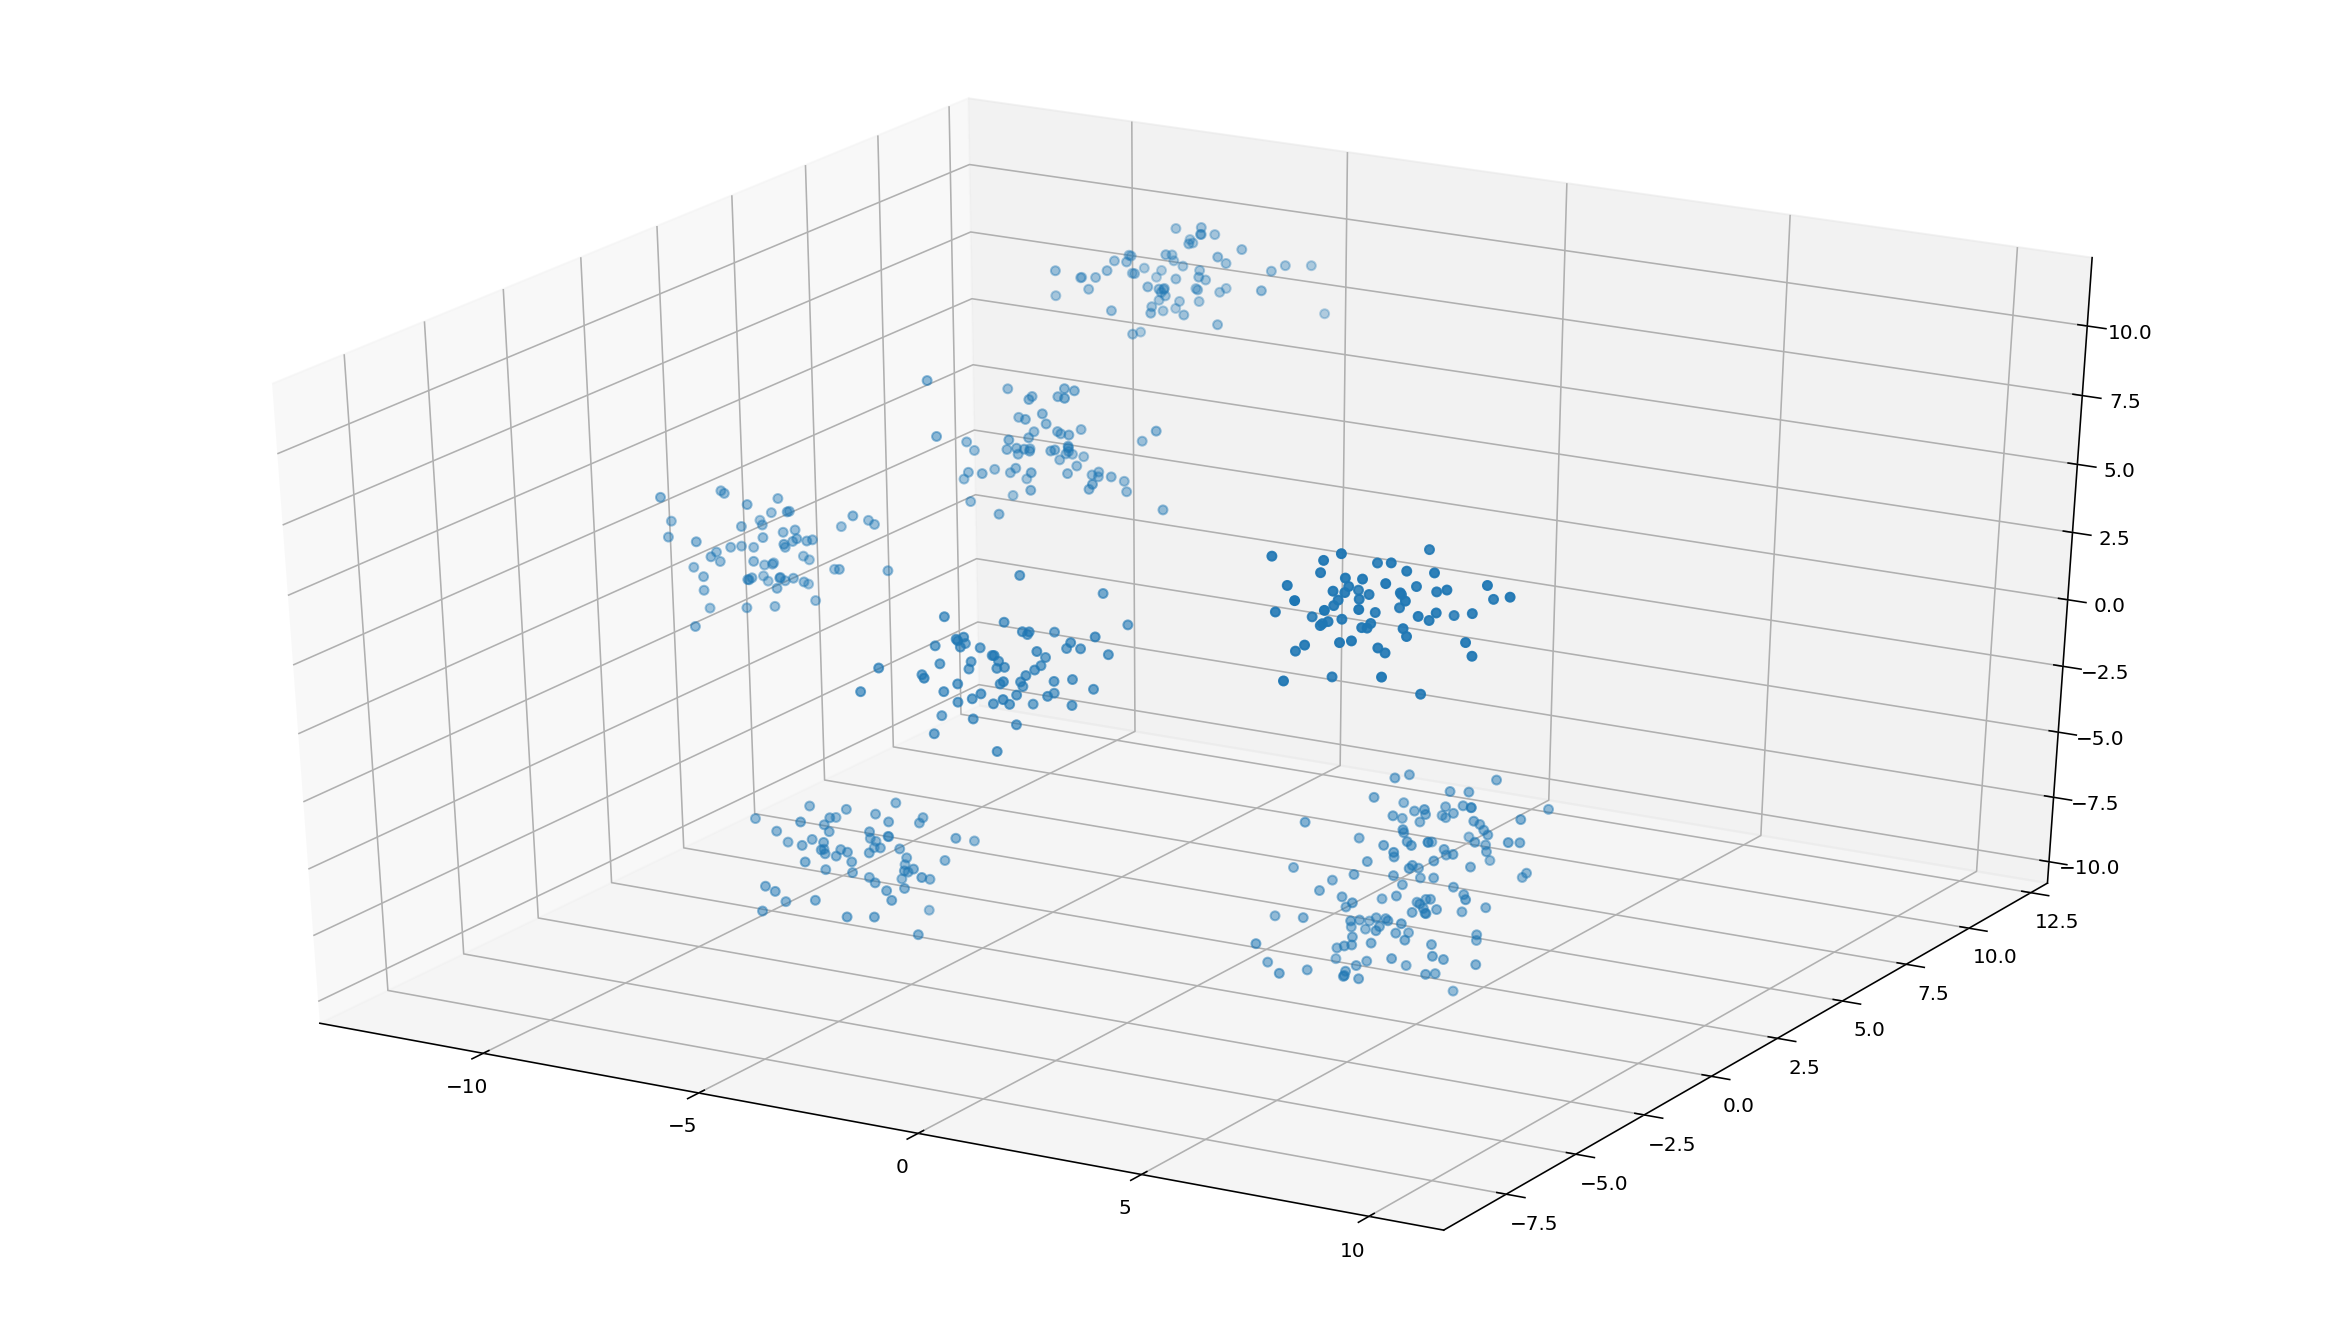

In [9]:
h.plot_q4_data()

In [10]:
question_4_clusters = 7

#Then this will test your number against what we used to generate the data
display.HTML(t.test_question_4(question_4_clusters))

This data is actually the same as the data used in question 3.  Isn't it crazy how looking at data from a different angle can make us believe there are a different number of clusters in the data!  We will look at how to address this in the upcoming parts of this lesson.


## Choosing K
So far you have identified `k` when you can visually inspect your data to identify the number of clusters. However, in practice, you often have tons of data with many features. This can make visualizing your clusters impossible.

In these cases, choosing k is often an art and a science. Often researchers have an idea of what k should be ahead of time. In other cases, no one has any idea what k should be! How do we choose k in these cases? Don't worry there is a general method used for these cases. On the next page, you will see how it works!

<img src='selecting_k.png' width = 400px>

### Elbow Method
When you have no idea how many clusters exist in your dataset, a common strategy for determining `k` is the elbow method. In the elbow method, you create a plot of the number of clusters (on the x-axis) vs. the average distance of the center of the cluster to each point (on the y-axis). This plot is called a scree plot

The average distance will always decrease with each additional cluster center. However, with fewer clusters, those decreases will be more substantial. At some point, adding new clusters will no longer create a substantial decrease in the average distance. This point is known as the elbow.

#### Visualizing
<img src='k_eq_1.png' width = 400px>
<img src='k_eq_2.png' width = 400px>
<img src='k_eq_3.png' width = 400px>
<img src='k_elbow.png' width = 400px>
<img src='k_elbow_1.png' width = 400px>

With the elbow method, you're looking for a point that increasing K no longer leads to a large decrease in the distance from the center.

### Changing K

Pactice using different values of k in the k-means algorithm, and see how this changes the clusters that are observed in the data.  You'll also get excperience determining what the best value for k might be for a dataset.

To get started, let's read in our necessary libraries.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import helpers2 as h
import tests as t
from IPython import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Make the images larger
plt.rcParams['figure.figsize'] = (16, 9)

`1.` To get started, there is a function called **simulate_data** within the **helpers2** module.  Read the documentation on the function by running the cell below.  Then use the function to simulate a dataset with 200 data points (rows), 5 features (columns), and 4 centers

In [2]:
h.simulate_data?

In [3]:
data = h.simulate_data(n=200, features=5, centroids=4)

In [4]:
t.test_question_1(data)

Looks good!  Continue!


`2.` Because of how you set up the data, what should the value of **k** be?

In [5]:
k_val = 4
t.test_question_2(k_val)

That's right!  The value of k is the same as the number of centroids used to create your dataset.


`3.` Let's try a few different values for **k** and fit them to our data using **KMeans**.

To use KMeans, you need to follow three steps:

**I.** Instantiate your model.

**II.** Fit your model to the data.

**III.** Predict the labels for the data.

In [7]:
# Instantiate with 4 centers
k_means_4 = KMeans(n_clusters=4)
# Fit the model
model_4 = k_means_4.fit(data)
# Predict
labels_4 = model_4.predict(data)

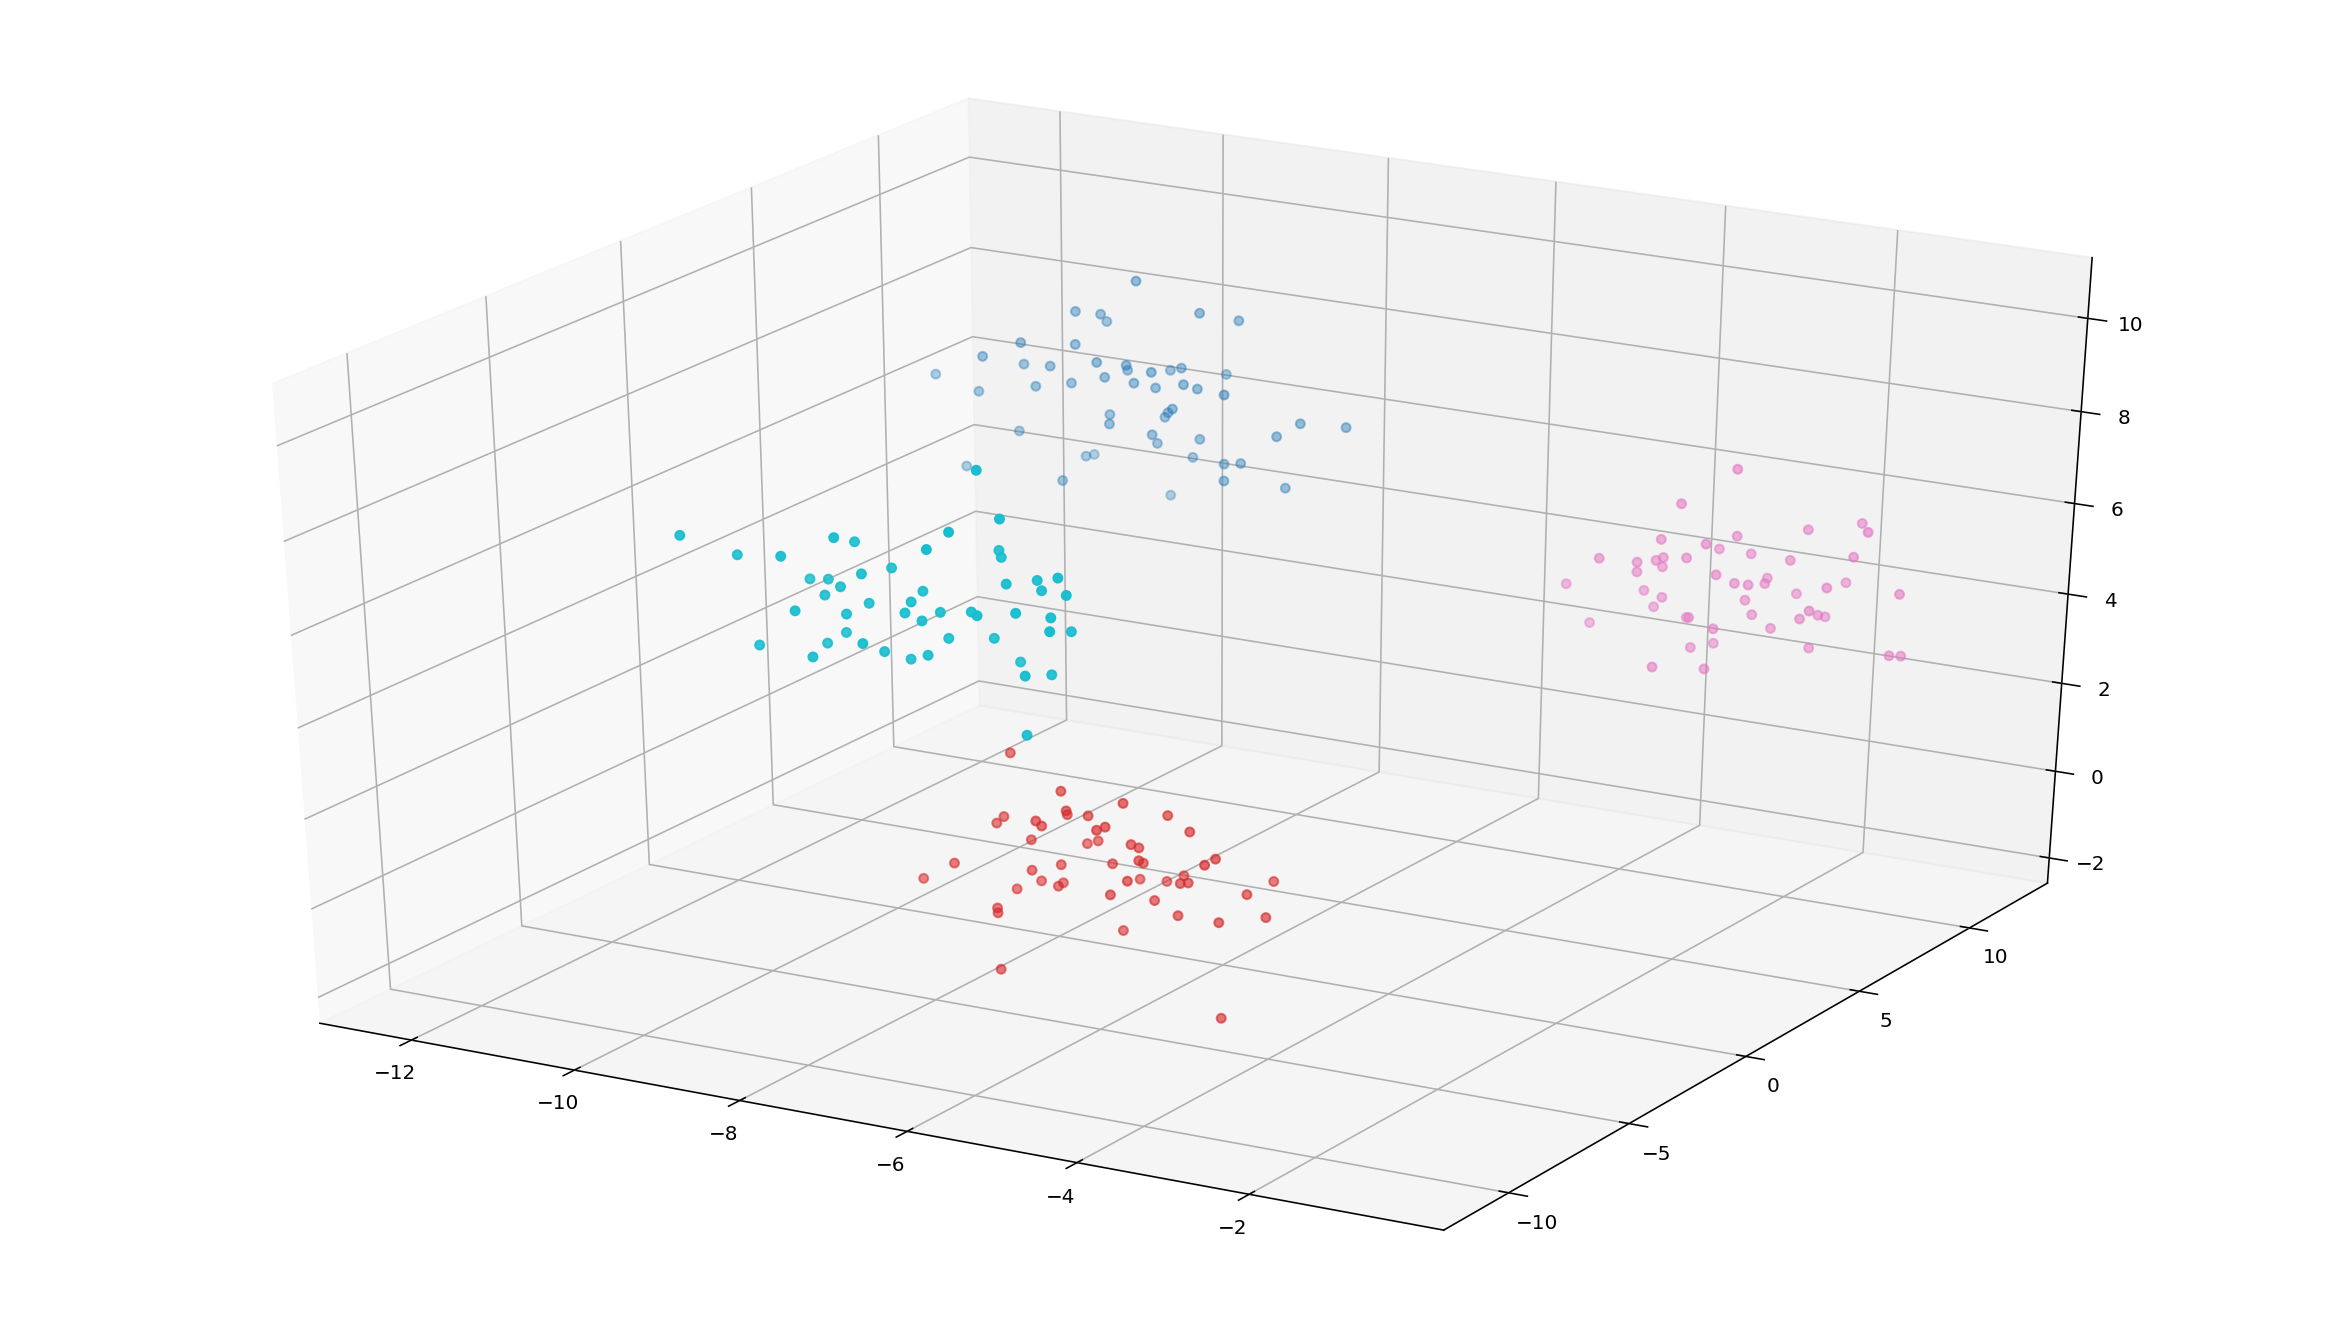

In [33]:
# Check work - should provide plot of data colored by center
h.plot_data(data, labels_4)

`4.` Now try again, but this time fit kmeans using 2 clusters instead of 4 to your data.

In [9]:
k_means_2 = KMeans(n_clusters=2)
model_2 = k_means_2.fit(data)
labels_2 = model_2.predict(data)

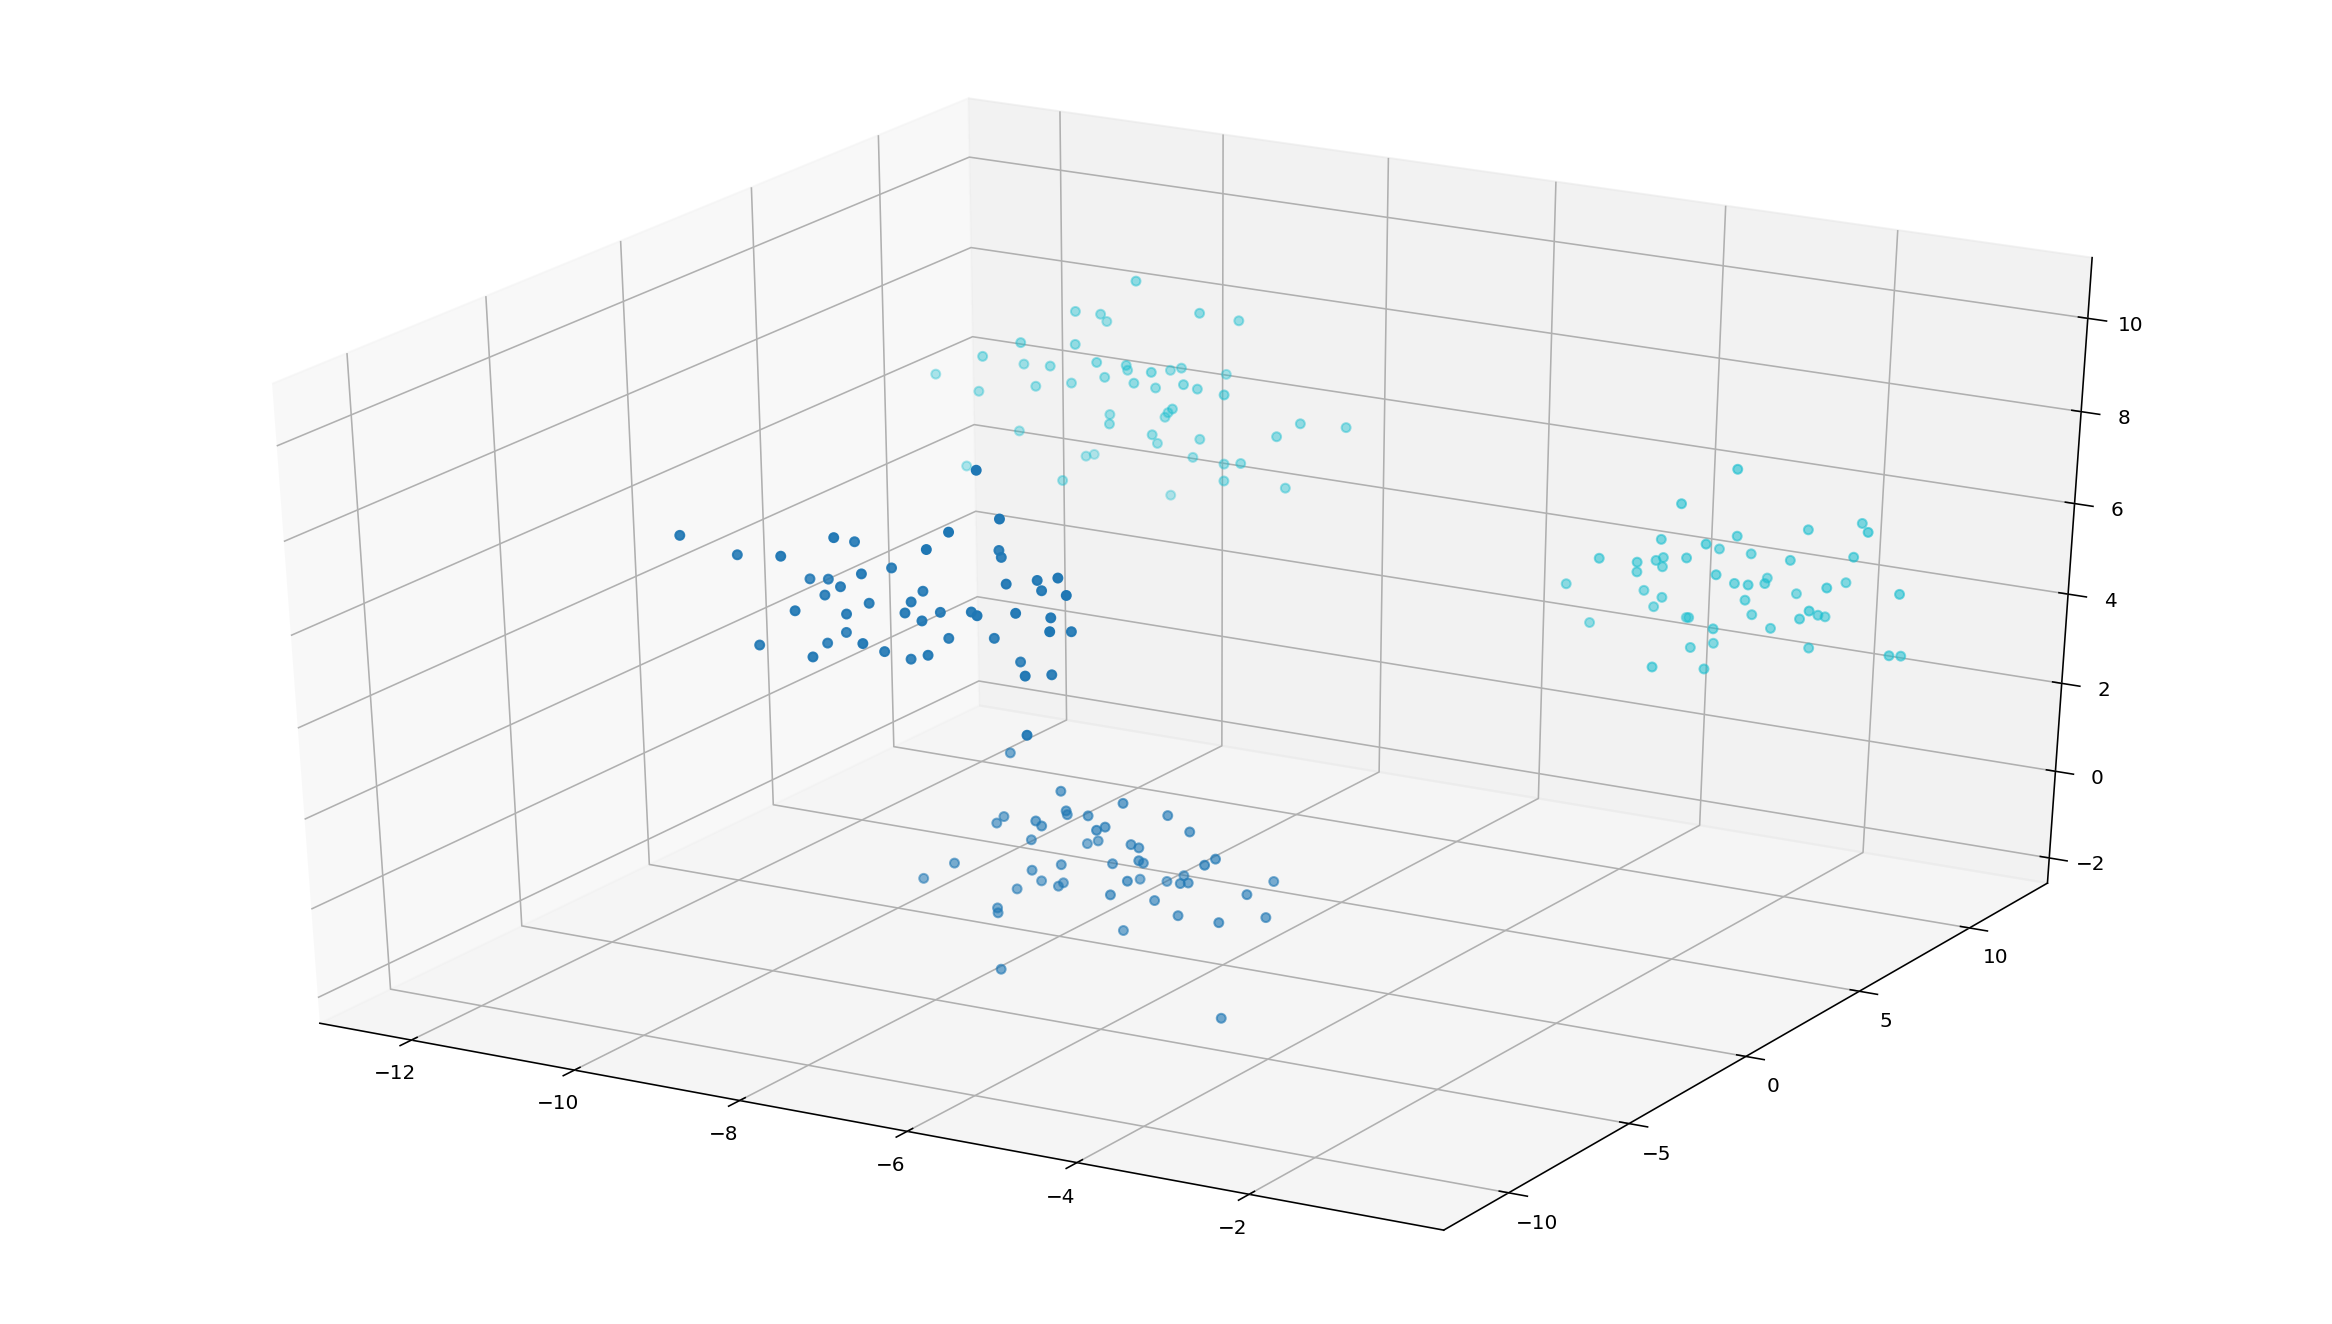

In [34]:
h.plot_data(data, labels_2)

`5.` Now try one more time, but with the number of clusters in kmeans to 7.

In [11]:
k_means_7 = KMeans(n_clusters=7)
model_7 = k_means_7.fit(data)
labels_7 = model_7.predict(data)

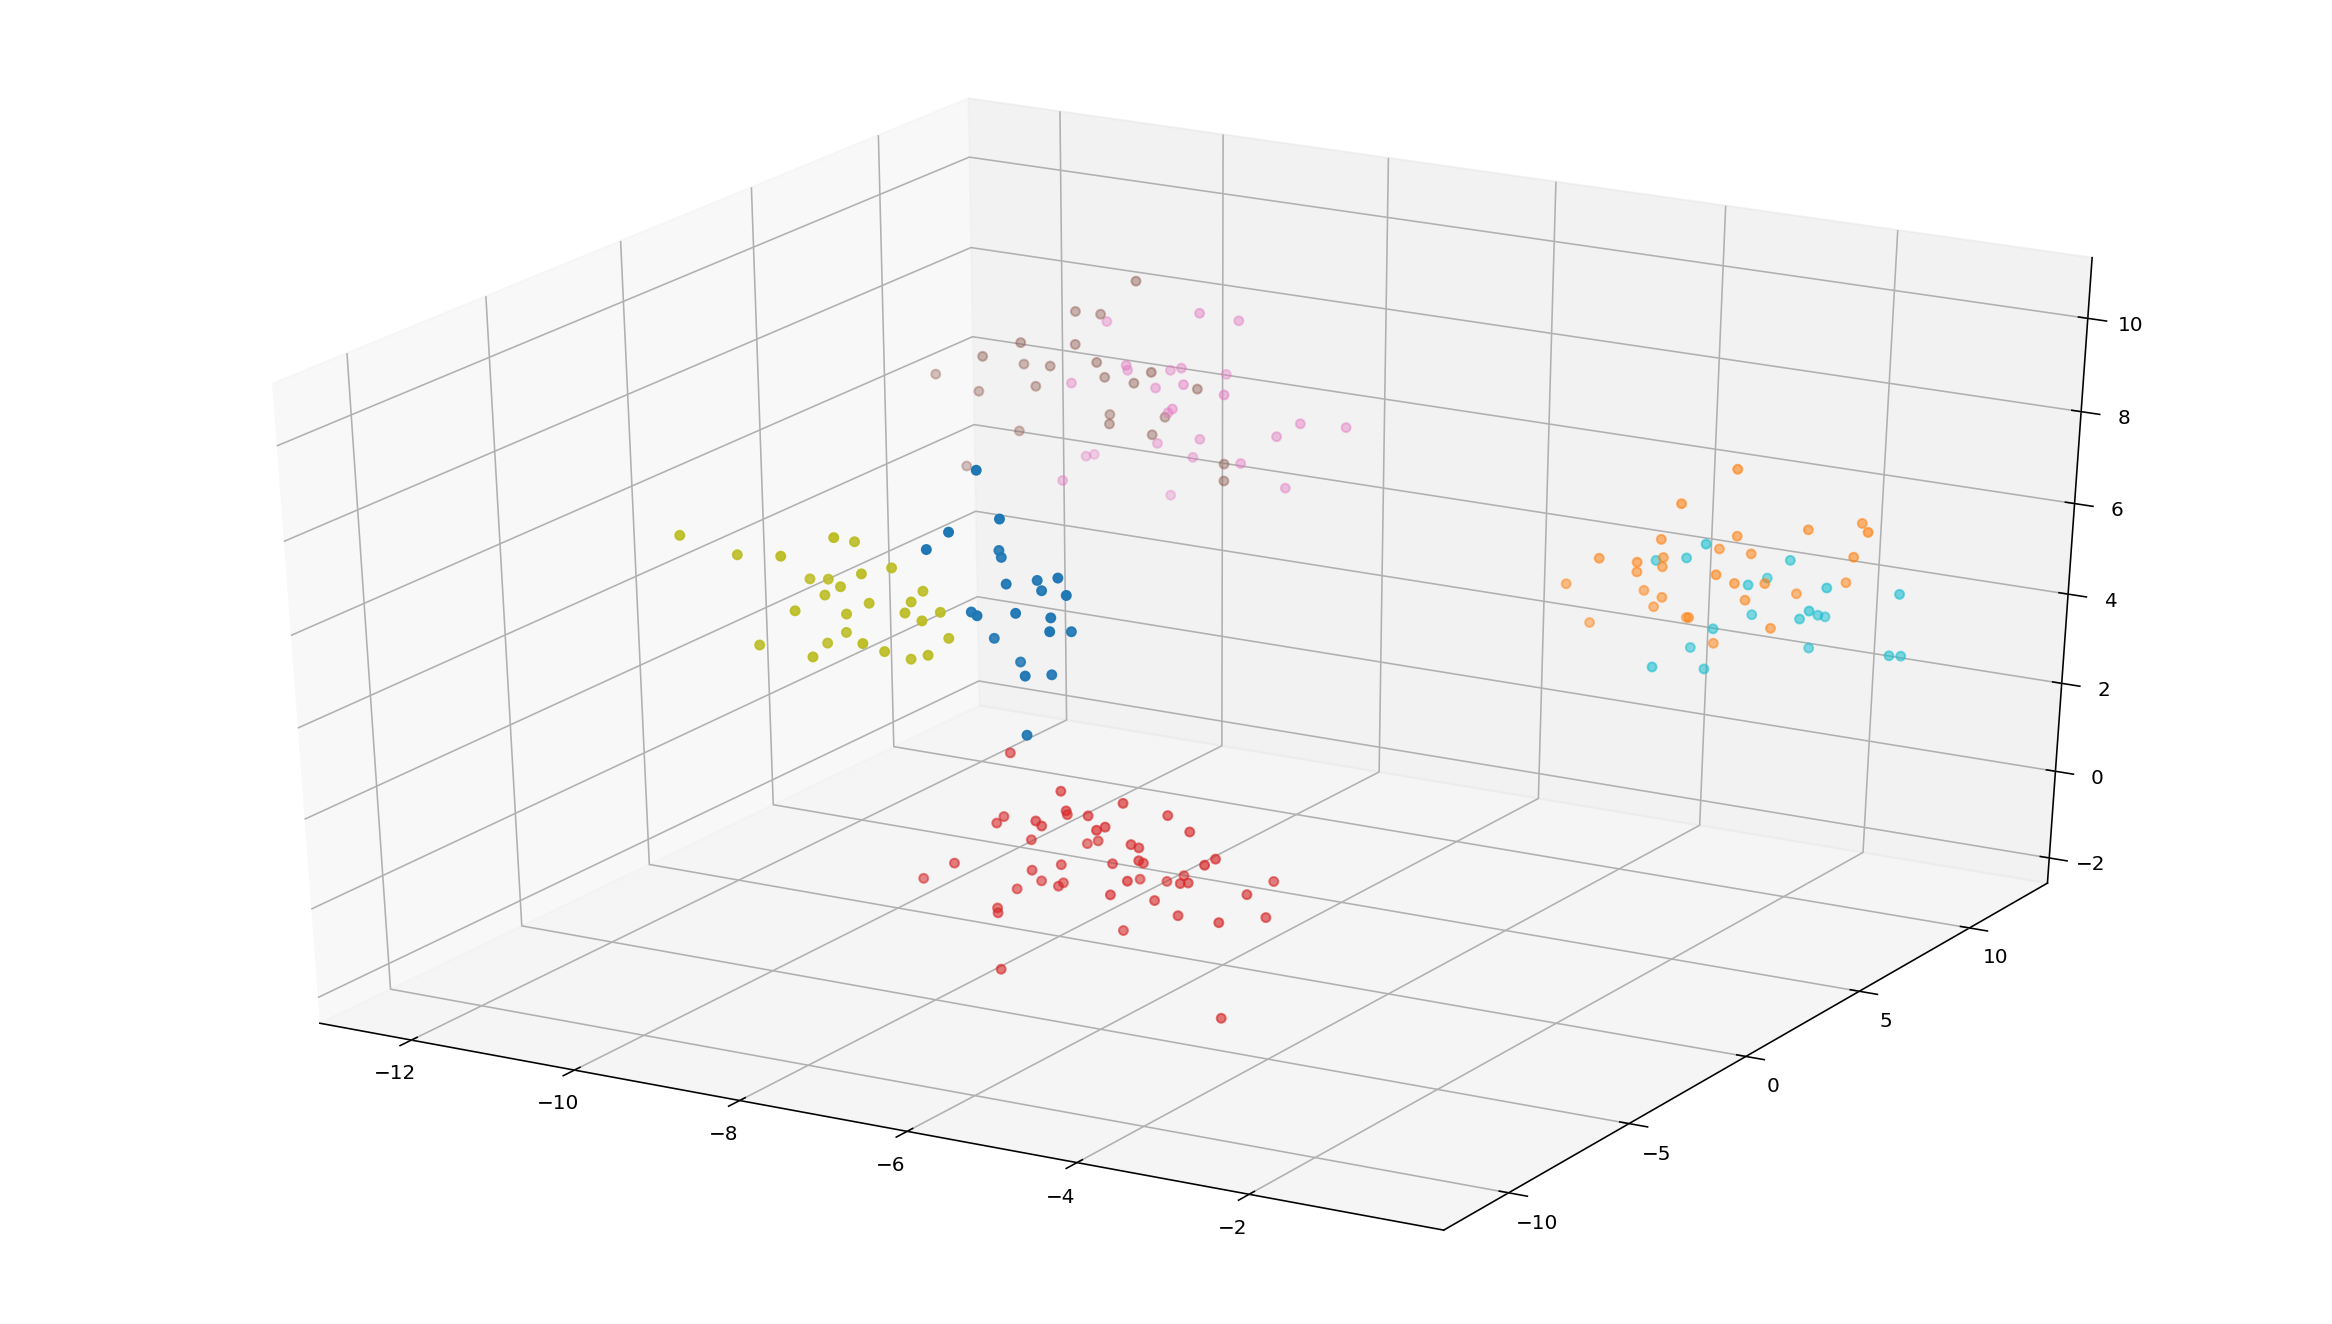

In [35]:
h.plot_data(data, labels_7)

Visually, we get some indication of how well our model is doing, but it isn't totally apparent. Each time additional centers are considered, the distances between the points and the center will decrease.  However, at some point, that decrease is not substantial enough to suggest the need for an additional cluster.  

Using a scree plot is a common method for understanding if an additional cluster center is needed.  The elbow method used by looking at a scree plot is still pretty subjective, but let's take a look to see how many cluster centers might be indicated.
_________

`6.` Once you have **fit** a kmeans model to some data in sklearn, there is a **score** method, which takes the data.  This score is an indication of how far the points are from the centroids.  By fitting models for centroids from 1-10, and keeping track of the score and the number of centroids, you should be able to build a scree plot.  

This plot should have the number of centroids on the x-axis, and the absolute value of the score result on the y-axis.  You can see the plot I retrieved by running the solution code.  Try creating your own scree plot, as you will need it for the final questions.

In [13]:
# A place for your work - create a scree plot - you will need to
# Fit a kmeans model with changing k from 1-10
# Obtain the score for each model (take the absolute value)
# Plot the score against k

In [17]:
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding SSE for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the SSE score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)

    # Then fit the model to your data using the fit method
    model = kmeans.fit(data)

    # Obtain a score related to the model fit
    score = np.abs(model.score(data))

    return score

In [18]:
def fit_mods(centers=list(range(1,11))):
    scores = []

    for center in centers:
        scores.append(get_kmeans_score(data, center))

    return centers, scores

In [19]:
centers, scores = fit_mods(centers=list(range(1,11)))

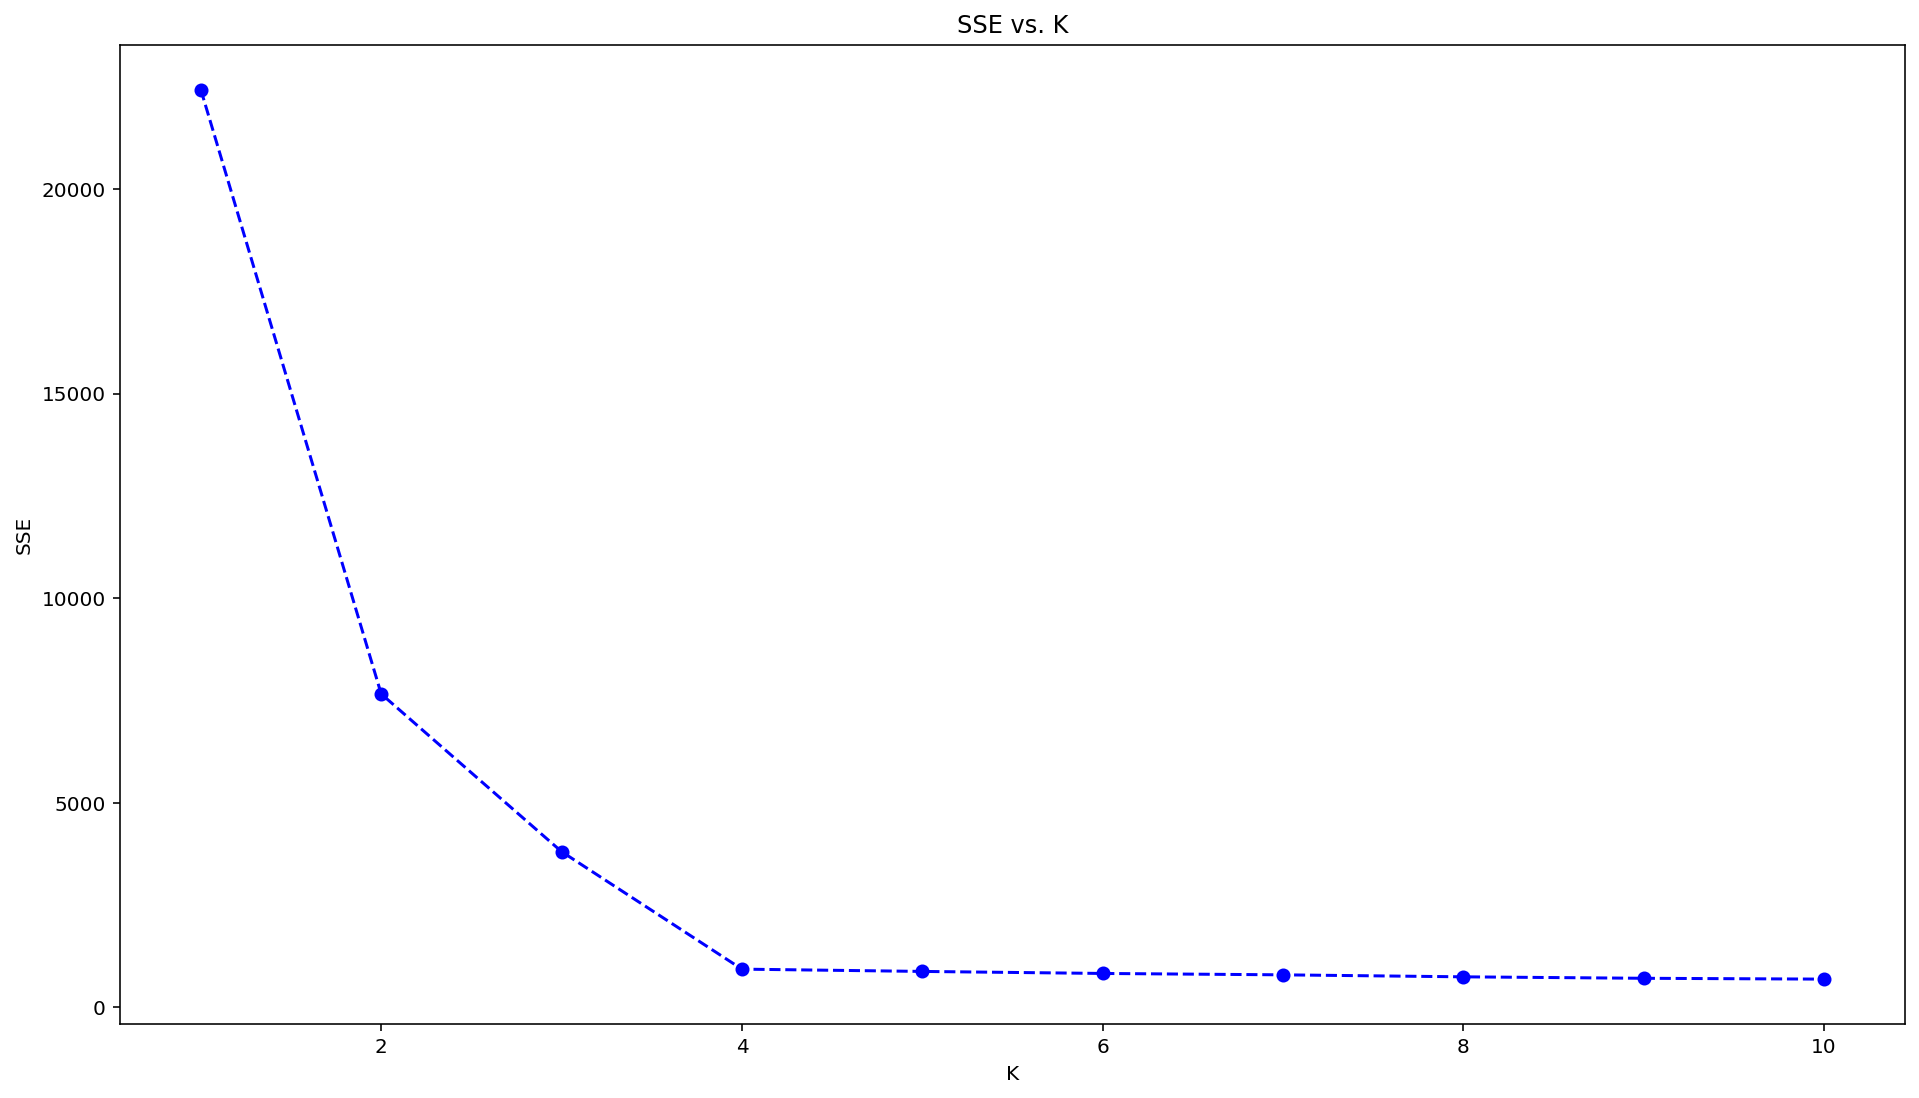

In [36]:
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K')
plt.show()

In [21]:
import seaborn as sns

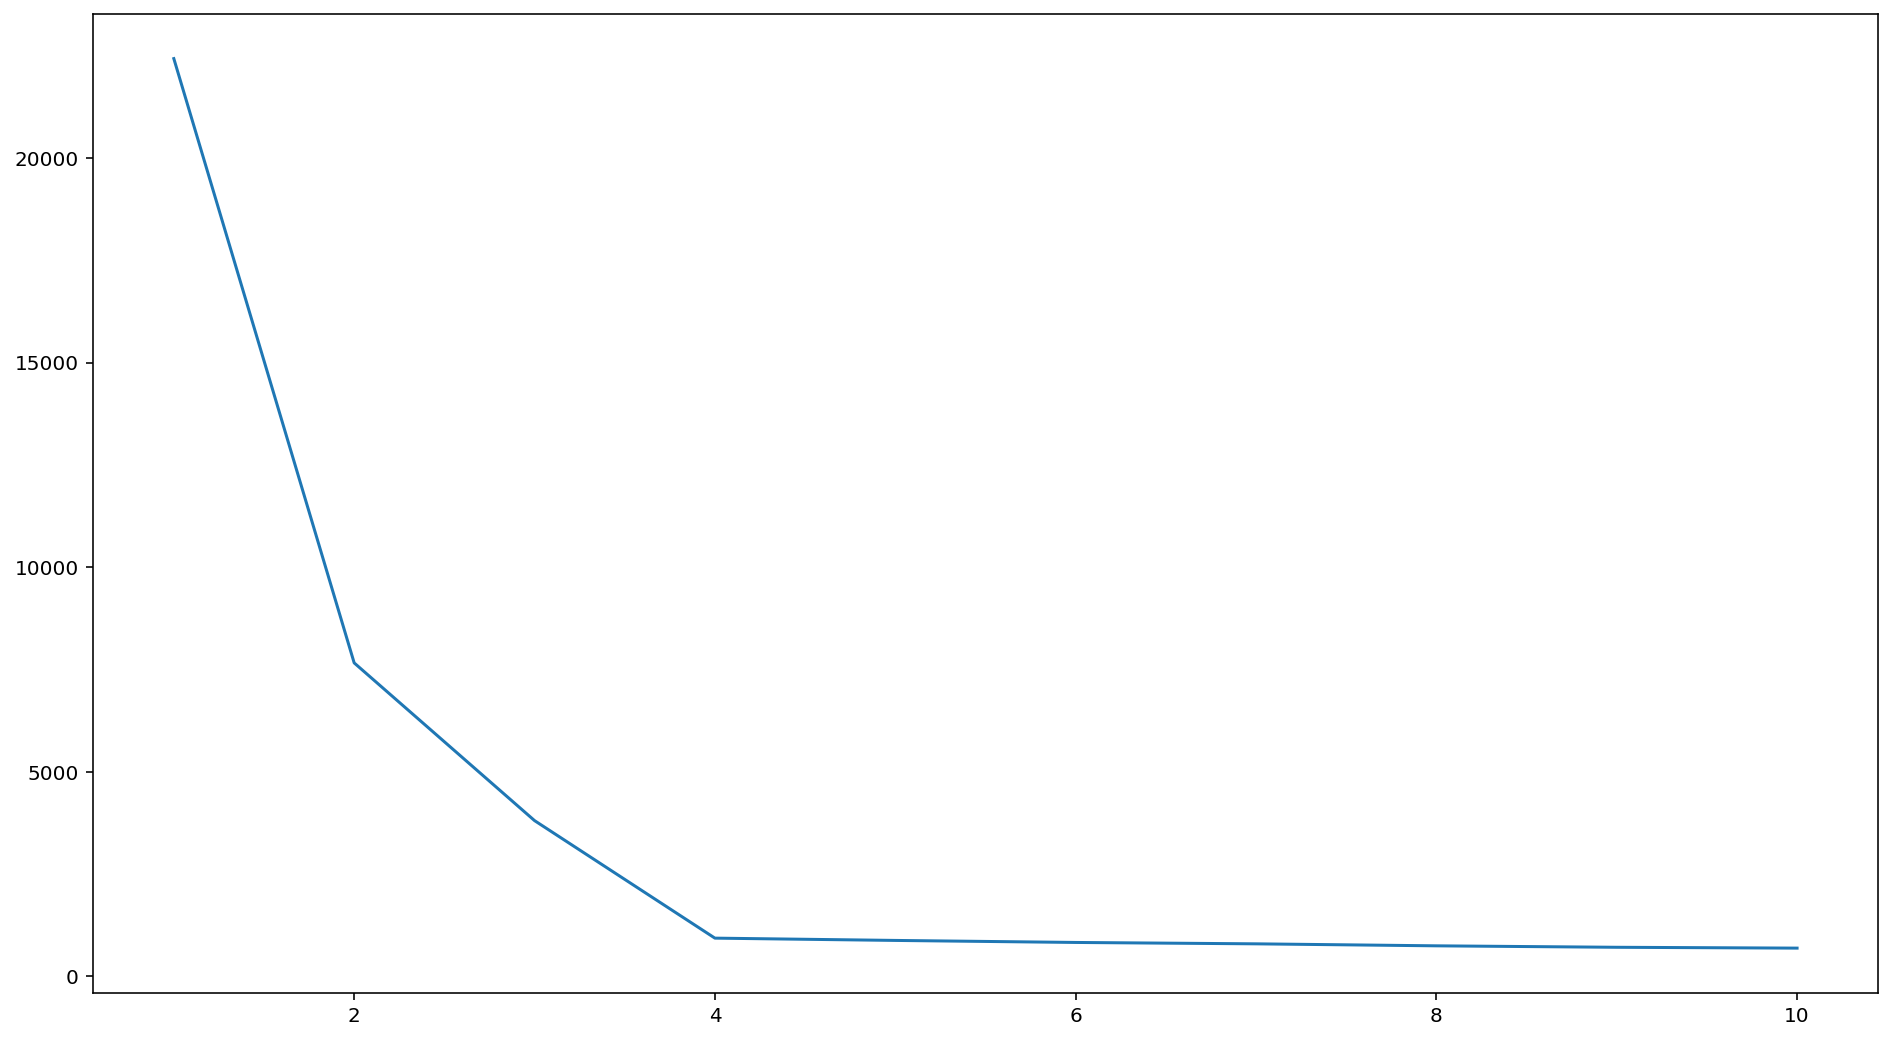

In [37]:
sns.lineplot(centers, scores, markers=True)
plt.show()

`7.` Using the scree plot, how many clusters would you suggest as being in the data?  What is K?

In [31]:
k_val = 4
display.HTML(t.test_question_7(k_val))

That's right!  We set up the data with 4 centers, and the plot is consistent!  We can see a strong leveling off after 4 clusters, which suggests 4 clusters should be used.


# How does K-Means work?

you know most of what you needed to about how the k-means algorithm works:

You choose k as the number of clusters you believe to be in your dataset or...
You use the elbow method to determine k for your data.
Then this number of clusters is created within your dataset, where each point is assigned to each group.
__________

However, to understand what edge cases might occur when grouping points together, it is necessary to understand exactly what the k-means algorithm is doing. Here is one method for computing k-means:

`1.` Randomly place k centroids amongst your data.

> Then within a loop until convergence perform the following two steps:

`2.` Assign each point to the closest centroid.

`3.` Move the centroid to the center of the points assigned to it.

At the end of this process, you should have k-clusters of points.
_______

The [blog by Naftali Harris](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/) is spectacular at showing you how k-means works for a number of situations. You can try it yourself!

As an exercise for yourself, you might try coding up the algorithm yourself in Python. [This blog by Mubaris Hassan](https://mubaris.com/posts/kmeans-clustering/) may be helpful if you decide to take on this task!

_______

# Optimal Solutions

You saw that how the starting points of the centroids can actually make a difference as to the final results you obtain from the k-means algorithm.

In order to assure you have the "best" set of clusters, the algorithm you saw earlier will be **performed a few times with different starting points (that are substantially different from one another).**

The best set of clusters is then the clustering that creates the smallest average distance from each point to its corresponding centroid.

<img src='opt_k_means.png' width=400px>
________

# Feature Scaling

<img src='normalizing.png' width=400px>

**For any machine learning algorithm that uses distances as a part of its optimization, it is important to scale your features**
<img src=normalizing1.png width=400px>

You saw this earlier in **regularized forms of regression like Ridge and Lasso**, but it is also true for **k-means**. In future sections on **PCA** and **ICA**, feature scaling will again be important for the successful optimization of your machine learning algorithms.

Though there are a large number of ways that you can go about scaling your features, there are two ways that are most common:
`1.` **Normalizing** or **Max-Min Scaling** - this type of scaling transforms variable values to between 0 and 1.
`2.` **Standardizing** or **Z-Score Scaling** - this type of scaling transforms variable values so they have a **mean of 0 and standard deviation of 1**

Let's look at a more concrete example of this, as well as see how to perform these operations in Python.

## Example:
<img src='feat_scale1.png' width=400px>
**Transform scale by changing to seconds and test score standardized**
<img src='feat_scale2.png' width=400px>
**The importance of standardizing data before clustering can be seen as noting the inconsistent geometric differences in points**
<img src='feat_scale3.png' width=600px>

Here you saw one example where k = 2 for the same dataset. However, depending on the scaling of the features in the dataset, we ended up with 2 completely different clusters.

In most cases, you will want to use Standardized scaling. On the next page, you will get some practice using python to scale data using the two scaling methods we have looked at:
`1.` Normalizing
`2.` Standardizing

 Standardizing your data (both features in the above case), would assure that we get consistent clustering of our data each time. Manipulating the clusters created by adjusting the feature scalings for either feature is cheating (or likely to provide misleading results)!

### Feature Scaling Example

You have now seen how feature scaling might change the clusters we obtain from the kmeans algorithm, but it is time to try it out!

First let's get some data to work with.  The first cell here will read in the necessary libraries, generate data, and make a plot of the data you will be working with throughout the rest of the notebook.

The dataset you will work with through the notebook is then stored in **data**.

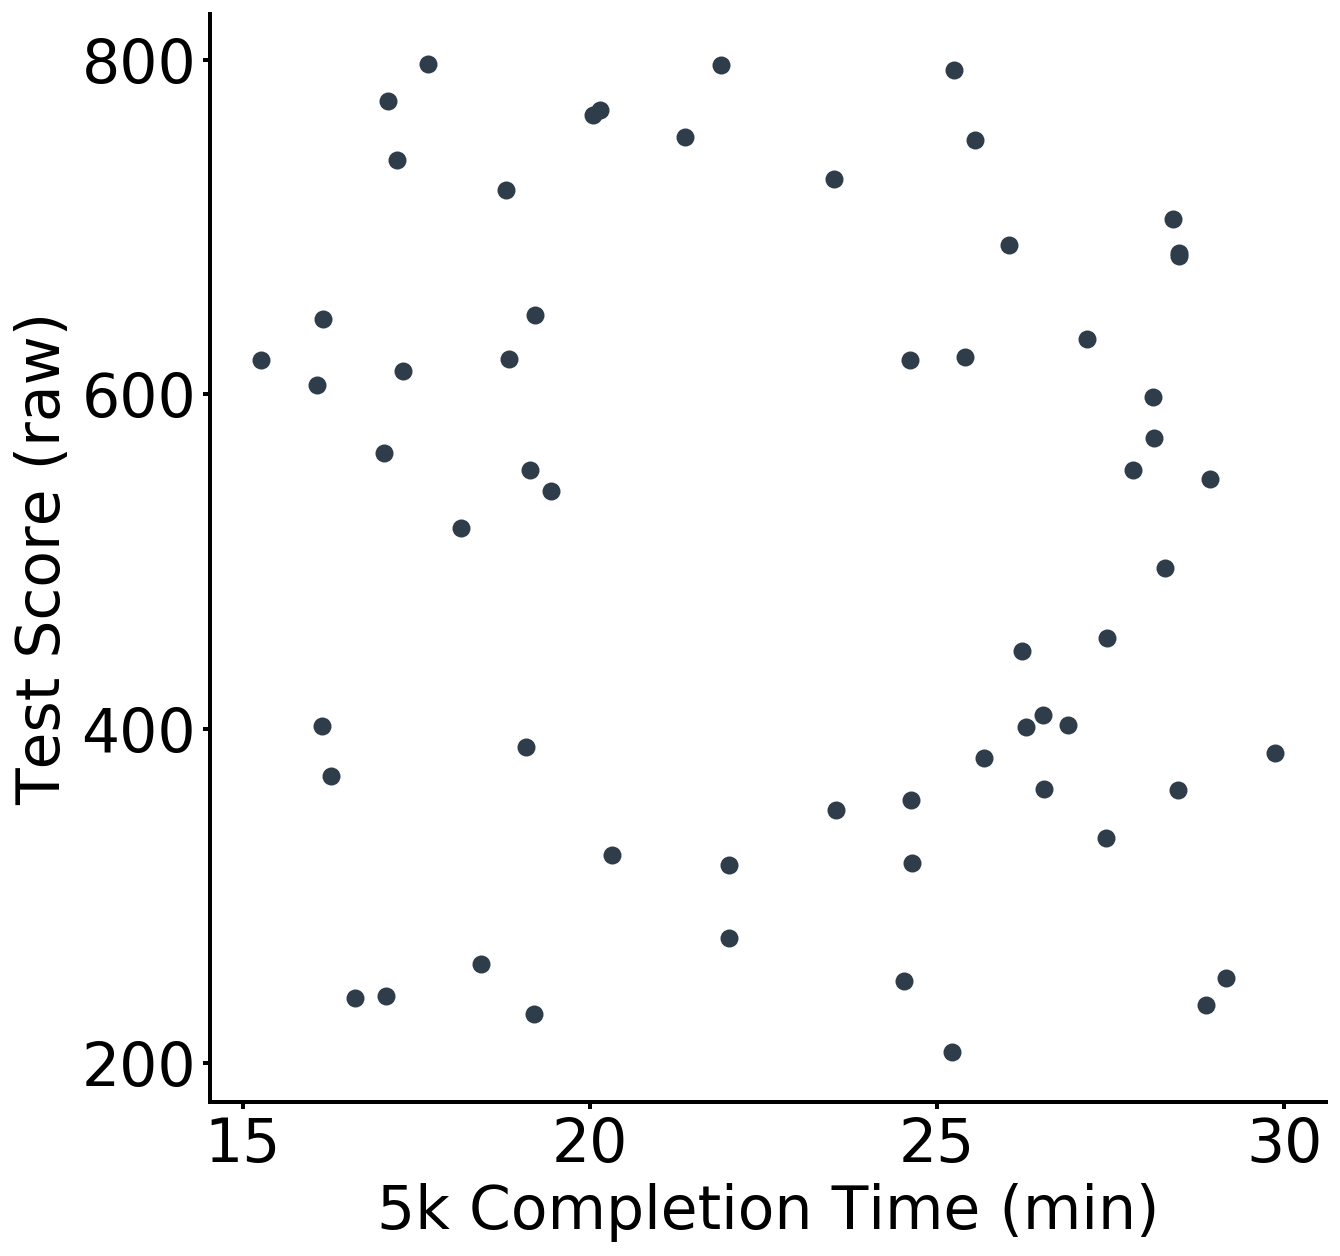

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from IPython.display import Image
from sklearn.datasets.samples_generator import make_blobs
import tests2 as t


%config InlineBackend.figure_format = 'retina'
# Make the images larger
plt.rcParams['figure.figsize'] = (16, 9)

# DSND colors: UBlue, Salmon, Gold, Slate
plot_colors = ['#02b3e4', '#ee2e76', '#ffb613', '#2e3d49']

# Light colors: Blue light, Salmon light
plot_lcolors = ['#88d0f3', '#ed8ca1', '#fdd270']

# Gray/bg colors: Slate Dark, Gray, Silver
plot_grays = ['#1c262f', '#aebfd1', '#fafbfc']


def create_data():
    n_points = 120
    X = np.random.RandomState(3200000).uniform(-3, 3, [n_points, 2])
    X_abs = np.absolute(X)

    inner_ring_flag = np.logical_and(X_abs[:,0] < 1.2, X_abs[:,1] < 1.2)
    outer_ring_flag = X_abs.sum(axis = 1) > 5.3
    keep = np.logical_not(np.logical_or(inner_ring_flag, outer_ring_flag))

    X = X[keep]
    X = X[:60] # only keep first 100
    X1 = np.matmul(X, np.array([[2.5, 0], [0, 100]])) + np.array([22.5, 500])
    
    
    plt.figure(figsize = [10,10])

    plt.scatter(X1[:,0], X1[:,1], s = 64, c = plot_colors[-1])

    plt.xlabel('5k Completion Time (min)', size = 30)
    plt.xticks(np.arange(15, 30+5, 5), fontsize = 30)
    plt.ylabel('Test Score (raw)', size = 30)
    plt.yticks(np.arange(200, 800+200, 200), fontsize = 30)

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    [side.set_linewidth(2) for side in ax.spines.values()]
    ax.tick_params(width = 2)
    plt.savefig('C18_FeatScalingEx_01.png', transparent = True)
    
    
    data = pd.DataFrame(X1)
    data.columns = ['5k_Time', 'Raw_Test_Score']
    
    return data

data = create_data()

`1.` Take a look at the dataset.  Are there any missing values?  What is the average completion time?  What is the average raw test score?  Use the cells below to find the answers to these questions, and the dictioonary to match values and check against our solution.

In [44]:
print(data.info())
print("="*40)
print(data.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
5k_Time           60 non-null float64
Raw_Test_Score    60 non-null float64
dtypes: float64(2)
memory usage: 1.0 KB
None
                count        mean         std         min         25%  \
5k_Time          60.0   22.899027    4.536244   15.263902   18.820638   
Raw_Test_Score   60.0  511.699603  183.222427  206.597283  361.798208   

                       50%         75%         max  
5k_Time          24.033613   26.956643   29.867819  
Raw_Test_Score  545.795365  656.346547  797.599192  


In [45]:
# Use the dictionary to match the values to the corresponding statements
a = 0
b = 60
c = 22.9
d = 4.53
e = 511.7

q1_dict = {
'number of missing values': a,
'the mean 5k time in minutes': c,    
'the mean test score as a raw value': e,
'number of individuals in the dataset': b
}

# check your answer against ours here
t.check_q1(q1_dict)

AttributeError: module 'tests2' has no attribute 'check_q1'